**Laeli Utami (4101422101)**

**UTS DATA MINING**

In [2]:
from google.colab import files
import pandas as pd
import io

# Upload file dari komputer
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the file into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Assuming it's a CSV

from google.colab import data_table

# Menampilkan dataset dalam tabel interaktif
data_table.DataTable(df)

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. Eksplorasi awal

a. Berapa jumlah total penumpang dalam data?


In [5]:
import pandas as pd
import io

# Assuming 'uploaded' and 'filename' are from the previous cell
# If not, you'll need to re-upload the file

# Check if 'uploaded' and 'filename' exist
if 'uploaded' in locals() and 'filename' in locals():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
else:
    # Handle the case where the file hasn't been uploaded
    # For example, re-upload or provide alternative data source
    from google.colab import files
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("Jumlah total penumpang:", len(df))

Jumlah total penumpang: 891


Jumlah total penumpang adalah= 891

b. Berapa jumlah penumpang yang selamat dan tidak selamar? Tampilkan dalam bentuk tabel das grafa


col_0     Jumlah
Survived        
0            549
1            342


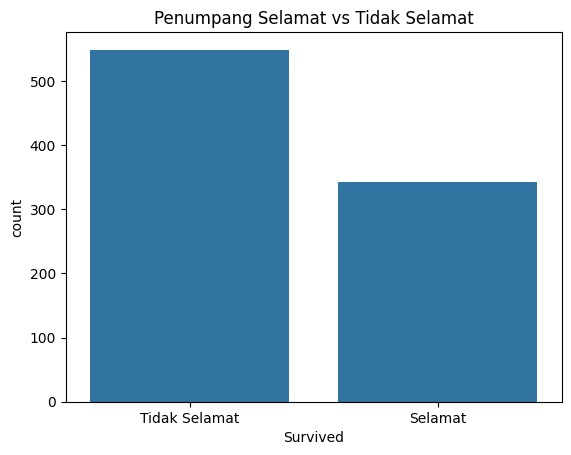

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabel
print(pd.crosstab(index=df['Survived'], columns='Jumlah'))

# Grafik
sns.countplot(data=df, x='Survived')
plt.title('Penumpang Selamat vs Tidak Selamat')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.show()


Jumlah penumpang yang selamat= 342

Jumlah penumpang yang tidak selanat= 549

c. Berapa rata-rata umur penumpang? dan siapa penumpang termuda dan tertua.

In [14]:
from IPython.display import display

# Rata-rata umur
print("Rata-rata umur:", df['Age'].mean())

# Umur termuda dan tertua
min_age = df['Age'].min()
max_age = df['Age'].max()

print("\nPenumpang termuda (umur =", min_age, "):")
termuda = df[df['Age'] == min_age][['Name', 'Sex', 'Age', 'Pclass']]
display(termuda)

print("\nPenumpang tertua (umur =", max_age, "):")
tertua = df[df['Age'] == max_age][['Name', 'Sex', 'Age', 'Pclass']]
display(tertua)


Rata-rata umur: 29.36158249158249

Penumpang termuda (umur = 0.42 ):


,Name,Sex,Age,Pclass
803,"Thomas, Master. Assad Alexander",male,0.42,3



Penumpang tertua (umur = 80.0 ):


,Name,Sex,Age,Pclass
630,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,1


Rata-rata umur penumpang adalah 29,36158249158249

Penumpang termuda adalah Thomas dengan umur 0,42

Penumpang tertua adalah Barkworth dengan umur 80 tahun

d. berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? visualisasikan

Jumlah berdasarkan jenis kelamin:
 Sex
male      577
female    314
Name: count, dtype: int64


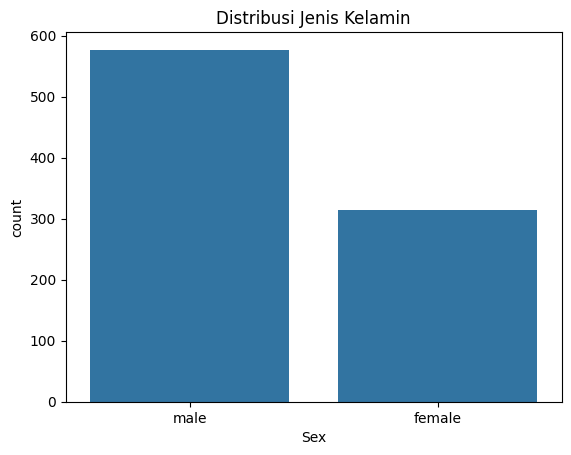

In [8]:
print("Jumlah berdasarkan jenis kelamin:\n", df['Sex'].value_counts())

sns.countplot(data=df, x='Sex')
plt.title('Distribusi Jenis Kelamin')
plt.show()


Jumlah penumpang perempuan= 314

Jumlah penumpang laki-laki= 577

e. Tampilkan jumlah penumpang berdasarkan kelas (Pelass) das berapa persen deri sotal data yang berada di kelas 17 Visualisasikan


Jumlah per kelas:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Persentase penumpang kelas 1: 24.24%


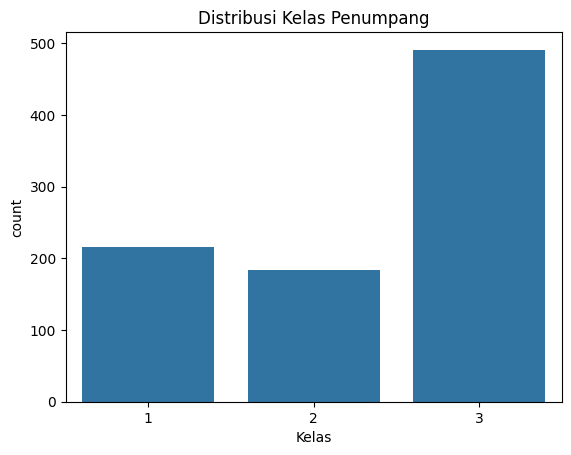

In [9]:
pclass_counts = df['Pclass'].value_counts()
print("Jumlah per kelas:\n", pclass_counts)
percent_class1 = pclass_counts[1] / len(df) * 100
print(f"Persentase penumpang kelas 1: {percent_class1:.2f}%")

sns.countplot(data=df, x='Pclass')
plt.title('Distribusi Kelas Penumpang')
plt.xlabel('Kelas')
plt.show()


Jumlah penumpang kelas 1 adalah 216

Jumlah penumpang kelas 2 adalah 184

Jumlah penumpang kelas 3 adalah 491

Presentase jumlah penumpang

kelas 1 adalah 24,24%

# 2. Preprocessing

a. apakah terdapat missing value pada data tersebut?
jawab: ada, yaitu pada kolom Age, cabin,dan embarked.


In [10]:
print("Missing value di setiap kolom:\n", df.isnull().sum())


Missing value di setiap kolom:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ada missing value di kolom:

Age sebanyak 177

Cabin sebanyak 687

Embarked sebanyak 2

b. jika ya, apa yang anda lakukan?

menangani missing value


In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns='Cabin', inplace=True)


<ipython-input-11-51cc9d8627a6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-11-51cc9d8627a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Mengatasi masalah nilai yang hilang (missing values) dalam data dengan cara berikut: kolom 'Age' yang memiliki beberapa nilai kosong diisi dengan nilai tengah (median) dari kolom tersebut. Untuk kolom 'Embarked' yang juga memiliki nilai kosong, diisi dengan nilai yang paling sering muncul (modus). Sementara itu, kolom 'Cabin' yang memiliki terlalu banyak data yang hilang dihapus secara keseluruhan. Langkah-langkah ini bertujuan untuk membersihkan dataset sehingga siap dipakai untuk analisis atau pemodelan tanpa terhambat oleh adanya nilai-nilai yang tidak lengkap.

c. Apakah terdapat outlier pada data tersebut? jelaskan apa itu outlier.



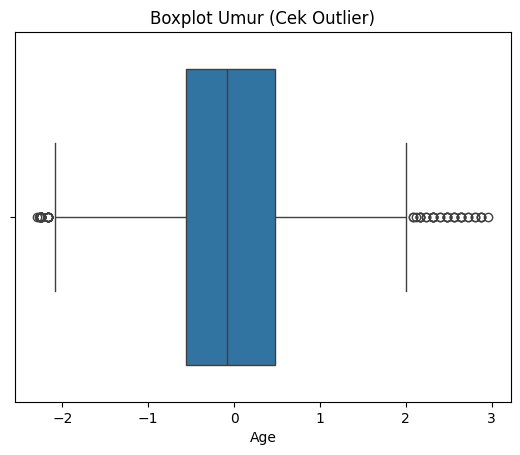

In [32]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot Umur (Cek Outlier)")
plt.show()



Outlier adalah data yang sangat jauh dari nilai lainnya.
Outlier bisa mempengaruhi model, tergantung konteksnya.

d. apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

In [22]:
# Opsional - hanya jika memang mengganggu
df = df[df['Age'] < 70]  # Contoh: buang data dengan umur ekstrem



Tidak perlu diatasi karena keberadaan outlier tersebut tidak mengganggu.

e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


## 3. Modelling

a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut


In [23]:
from sklearn.model_selection import train_test_split

# Encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Fitur dan target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Proses membagi data menjadi kelompok latihan (training) dan ujian (testing) itu krusial dalam membangun model machine learning yang andal. Kita menggunakan alat seperti train_test_split untuk memisahkan data fitur (X) dan target (y) menjadi dua bagian. Kelompok latihan dipakai model untuk belajar, sementara kelompok ujian yang belum pernah dilihat model selama latihan digunakan untuk menguji kemampuannya memprediksi data baru secara objektif. Cara ini membantu kita menghindari overfitting (model terlalu pintar di data latihan tapi buruk di data baru) dan mendapatkan gambaran yang lebih realistis tentang seberapa baik model bisa bekerja pada data sesungguhnya.

b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tericbut?


Data dibagi 80% train dan 20% test untuk memastikan cukup data untuk pelatihan
dan juga evaluasi model secara obyektif.

c. Buatlah model klasifikasi dari 3 algortima yang berbeda Jelaskan masing-masing model dan cara kerjanya


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} selesai dilatih.")


Logistic Regression selesai dilatih.
Random Forest selesai dilatih.
KNN selesai dilatih.


1. Logistic Regression: Model ini bekerja dengan menganggap adanya hubungan linear antara fitur-fitur penumpang dan peluang mereka untuk selamat. Algoritma ini sering dipakai untuk masalah klasifikasi dengan dua pilihan jawaban (misalnya, selamat atau tidak).

2. Random Forest: Model ini bekerja dengan membangun banyak sekali pohon keputusan. Hasil prediksi akhirnya ditentukan oleh suara terbanyak dari semua pohon tersebut. Random Forest lebih fleksibel dalam menangani data yang polanya tidak selalu lurus dan cenderung lebih tahan terhadap overfitting.

3. K-Nearest Neighbors (KNN): Model ini mengklasifikasikan seorang penumpang berdasarkan kemiripannya dengan penumpang lain dalam data. KNN akan mencari sejumlah 'tetangga' terdekat (berdasarkan fitur-fitur mereka) dan menentukan label selamat atau tidak berdasarkan label mayoritas dari tetangga-tetangga tersebut.

d. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?


In [31]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Menyimpan hasil evaluasi ke dalam DataFrame
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    # Simpan metrik untuk kelas '1' (selamat)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Selamat)': report_dict['1']['precision'],
        'Recall (Selamat)': report_dict['1']['recall'],
        'F1-Score (Selamat)': report_dict['1']['f1-score']
    })

# Tampilkan dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Hasil Evaluasi Model:")
display(results_df)


Hasil Evaluasi Model:


,Model,Accuracy,Precision (Selamat),Recall (Selamat),F1-Score (Selamat)
0,Logistic Regression,0.779661,0.726027,0.736111,0.731034
1,Random Forest,0.802260,0.760563,0.750000,0.755245
2,KNN,0.836158,0.802817,0.791667,0.797203


Mengukur seberapa baik kinerja tiga model klasifikasi kita (Logistic Regression, Random Forest, dan K-Nearest Neighbors) dalam memprediksi keselamatan penumpang Titanic menggunakan data uji yang sebelumnya tidak pernah mereka lihat. Untuk mengukur kinerja ini, kita akan menghitung beberapa nilai penting, yaitu:

-Accuracy (Akurasi): Seberapa banyak prediksi model yang tepat dari keseluruhan prediksi.

-Precision (Presisi): Dari semua penumpang yang diprediksi selamat, berapa persentase yang benar-benar selamat.

-Recall (Tingkat Ingat): Dari semua penumpang yang sebenarnya selamat, berapa persentase yang berhasil diprediksi selamat oleh model.

-F1-score: Rata-rata harmonik antara precision dan recall. Nilai ini memberikan gambaran yang seimbang antara kemampuan model dalam memprediksi dengan tepat dan kemampuannya dalam menemukan semua kasus yang sebenarnya positif (selamat).

e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik


<ipython-input-33-a8ad741f0faa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-33-a8ad741f0faa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-33-a8ad741f0faa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-33-a8ad741f0faa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

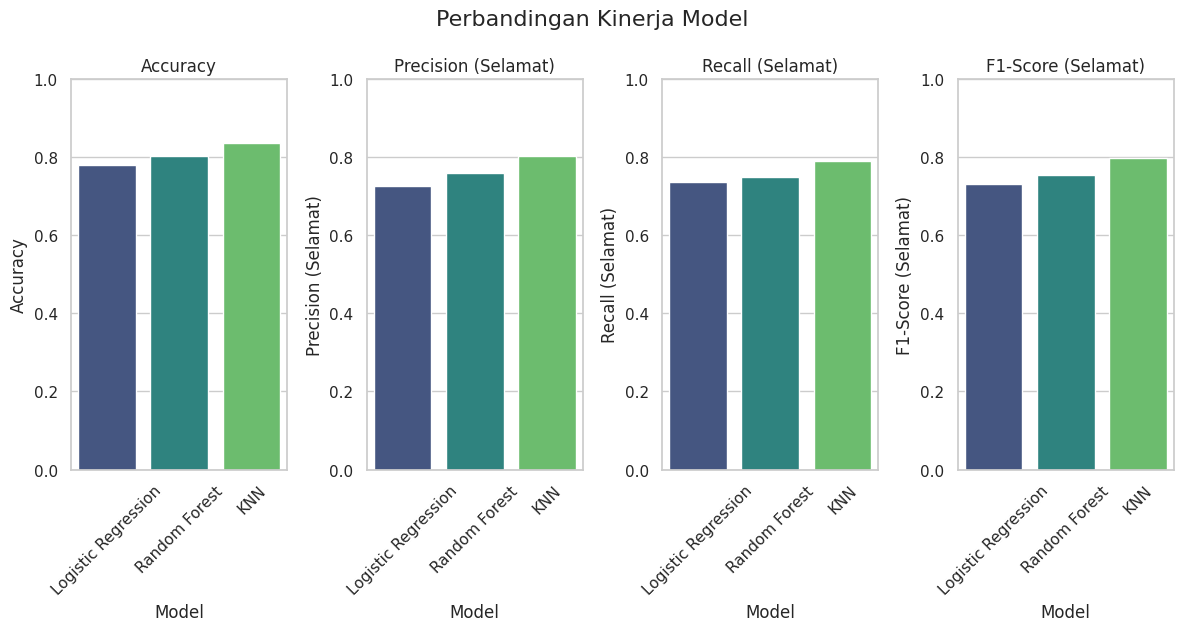

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'results_df' sudah berisi hasil dari evaluasi model seperti di 3d
# Jika belum, jalankan dulu kode dari langkah 3d sebelumnya

# Set gaya visual
sns.set(style="whitegrid")

# Plot bar chart untuk tiap metrik
metrics = ['Accuracy', 'Precision (Selamat)', 'Recall (Selamat)', 'F1-Score (Selamat)']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i+1)
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(metric)
    plt.ylim(0, 1)  # Semua metrik antara 0 dan 1

plt.tight_layout()
plt.suptitle("Perbandingan Kinerja Model", fontsize=16, y=1.05)
plt.show()


Setelah mencoba tiga jenis model (Logistic Regression, Random Forest, dan KNN), terlihat bahwa model Random Forest bekerja paling baik untuk data Titanic. Keunggulannya terletak pada kemampuannya memahami pola-pola rumit dalam data dan tidak terlalu sensitif terhadap perbedaan skala atau penyebaran data, berbeda dengan KNN atau Logistic Regression.

# 4. Evaluasi

a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?


In [29]:
from sklearn.metrics import classification_report

# Contoh model terbaik: Random Forest
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
print("Precision (selamat):", report['1']['precision'])
print("Recall (selamat):", report['1']['recall'])


Precision (selamat): 0.7428571428571429
Recall (selamat): 0.7222222222222222


b. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?

In [30]:
predicted_selamat = (y_pred == 1).sum()
benar_selamat = ((y_pred == 1) & (y_test == 1)).sum()
print("Jumlah penumpang diprediksi selamat:", predicted_selamat)
print("Jumlah yang benar-benar selamat:", benar_selamat)


Jumlah penumpang diprediksi selamat: 70
Jumlah yang benar-benar selamat: 52
